In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import caveclient
from caveclient import CAVEclient
afont = {'fontname':'Arial'}
client = CAVEclient('minnie65_public')
from datetime import datetime, timezone

In [12]:
settime = datetime(2023, 9, 19, 4, 0, 0, 0, tzinfo=timezone.utc)

df_ids_pred_met = pd.read_csv("./NotebookInputs/Final_EM_MetType_Preds_RFC_Resamp_AllFeats_NoRadius.csv")
df_ids_pred_met = df_ids_pred_met.loc[df_ids_pred_met['probability'] >0.54]
pre_id_mc = df_ids_pred_met["id"]
df_ids_pred_met = df_ids_pred_met.rename(columns = {"predicted_MET-type Label":"predicted_met_type_label"})

##merge predicted met-types with curated MCs
cur_ssts = pd.read_csv("./NotebookInputs/gamlin_2023_mcs.csv")
cur_ssts_pred = pd.merge(df_ids_pred_met, cur_ssts, left_on = 'id', right_on = 'pt_root_id')

col_ssts = pd.merge(df_ids_pred_met, cur_ssts, left_on = 'id', right_on = 'pt_root_id', how = 'outer', indicator = True)
not_cur_ssts = col_ssts.loc[col_ssts['_merge'] == 'left_only']


In [13]:
##query of synapses and cell types (latest version)
df2 = client.materialize.synapse_query(pre_ids= pre_id_mc, timestamp = settime)
md3 = client.materialize.query_table('aibs_metamodel_celltypes_v661', timestamp = settime)

In [14]:
soma_counts = md3['pt_root_id'].value_counts().rename_axis('pt_root_id').reset_index(name ='no_of_somas')
dfm = pd.merge(df2, md3, left_on = 'post_pt_root_id', right_on ='pt_root_id', how = 'right')
singlesomas = soma_counts.loc[soma_counts['no_of_somas'] == 1]
single_soma_merge = pd.merge(md3, singlesomas, left_on = 'pt_root_id', right_on = 'pt_root_id', how = 'inner')
dfm_somas = pd.merge(df2, single_soma_merge, left_on = 'post_pt_root_id', right_on = 'pt_root_id', how = 'inner')

In [15]:

###curated
sstmet4_pred = cur_ssts_pred.loc[cur_ssts_pred['predicted_met_type_label'] == "Sst-MET-4"]
sst4_id_cur = sstmet4_pred["id_x"]

sstmet5_pred = cur_ssts_pred.loc[cur_ssts_pred['predicted_met_type_label'] == "Sst-MET-5"]
sst5_id_cur = sstmet5_pred["id_x"]

sstmet6_pred = cur_ssts_pred.loc[cur_ssts_pred['predicted_met_type_label'] == "Sst-MET-6"]
sst6_id_cur = sstmet6_pred["id_x"]
# print (sst6_id_cur.head(10))

sstmet8_pred = cur_ssts_pred.loc[cur_ssts_pred['predicted_met_type_label'] == "Sst-MET-8"]
sst8_id_cur = sstmet8_pred["id_x"]

sstmet9_pred = cur_ssts_pred.loc[cur_ssts_pred['predicted_met_type_label'] == "Sst-MET-9"]
sst9_id_cur = sstmet9_pred["id_x"]

### column not curated

sstmet3_pred_col = not_cur_ssts.loc[not_cur_ssts['predicted_met_type_label'] == "Sst-MET-3"]
sst3_id_col = sstmet3_pred_col["id_x"]

sstmet4_pred_col = not_cur_ssts.loc[not_cur_ssts['predicted_met_type_label'] == "Sst-MET-4"]
sst4_id_col = sstmet4_pred_col["id_x"]

sstmet5_pred_col = not_cur_ssts.loc[not_cur_ssts['predicted_met_type_label'] == "Sst-MET-5"]
sst5_id_col = sstmet5_pred_col["id_x"]

sstmet6_pred_col = not_cur_ssts.loc[not_cur_ssts['predicted_met_type_label'] == "Sst-MET-6"]
sst6_id_col = sstmet6_pred_col["id_x"]
# print (sst6_id_col.head(10))

sstmet8_pred_col = not_cur_ssts.loc[not_cur_ssts['predicted_met_type_label'] == "Sst-MET-8"]
sst8_id_col = sstmet8_pred_col["id_x"]

sstmet9_pred_col = not_cur_ssts.loc[not_cur_ssts['predicted_met_type_label'] == "Sst-MET-9"]
sst9_id_col = sstmet9_pred_col["id_x"]




###other MET-types

sstmet3_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_met_type_label'] == "Sst-MET-3"]
sst3_id = sstmet3_pred["id"]
print (sst3_id)

sstmet4_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_met_type_label'] == "Sst-MET-4"]
sst4_id = sstmet4_pred["id"]
print (sst4_id)



12     864691135133707680
13     864691135162585389
14     864691135195576362
19     864691135273485073
26     864691135323181212
37     864691135394307317
77     864691135586352764
94     864691135772774651
103    864691135857273902
104    864691135865968005
109    864691135919630768
112    864691135940881830
115    864691135953216547
146    864691136275240461
172    864691137197468481
Name: id, dtype: int64
3      864691135013417622
10     864691135118298333
41     864691135416719546
73     864691135575425822
75     864691135577202181
98     864691135785592004
100    864691135808473885
117    864691135969447781
118    864691135969582181
138    864691136118647832
155    864691136602069713
Name: id, dtype: int64


5


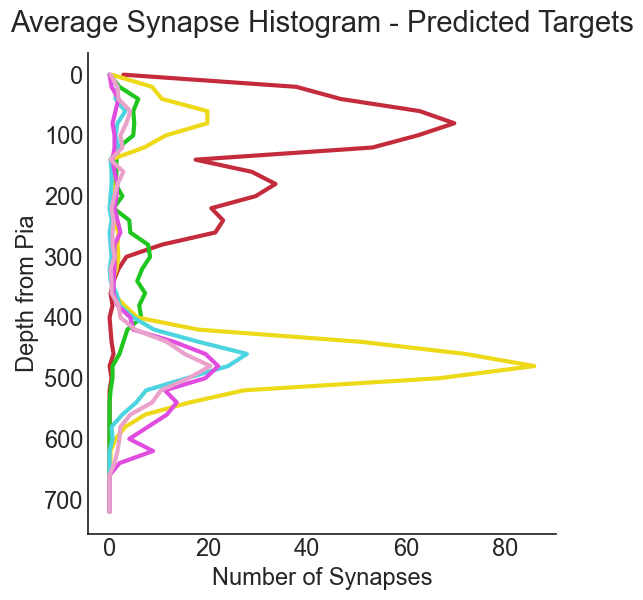

In [16]:
###Pred Met 8 & 6 avg horizontal histo predicted targets
# plt.rcParams["figure.figsize"] = (1,10)

newall = np.zeros(37, int)
new23 = np.zeros(37, int)
new4 = np.zeros(37, int) 
newit = np.zeros(37, int) 
newpt = np.zeros(37, int)
new6 = np.zeros(37, int) 
newinh = np.zeros(37, int)

# for i in met8_id: 
metid = sst6_id_cur
var_name = 'sst6_id_cur'
lenid = len(metid)
print (lenid)
for i in metid:
    
    ###Auto calls
    single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id'] == i].copy()
    single_cell['y'] = single_cell['ctr_pt_position'].map(lambda x: x[1])
    single_cell['y'] = (single_cell['y']*.004)-300
    single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas", "size", "y"]]
 
      
    converge = single_cell['post_pt_root_id'].value_counts().rename_axis('post_pt_root_id').reset_index(name ='counts')
    converge_call=pd.merge(single_cell_sub, converge, left_on = 'post_pt_root_id', right_on ='post_pt_root_id', how = 'outer')
    sorted_converge = converge_call.sort_values(["y"], ascending = True)
#     print (sorted_converge.head(10))
    converge_call23 = converge_call.loc[converge_call['cell_type'] == '23P']
    converge_call4 = converge_call.loc[converge_call['cell_type'] == '4P']
    converge_callit = converge_call.loc[converge_call['cell_type'] == '5P-IT']
    converge_callpt = converge_call.loc[converge_call['cell_type'] == '5P-ET']
    converge_call6 = converge_call.loc[(converge_call['cell_type'] == '6P-CT') | (converge_call['cell_type'] == '6P-IT')]
    converge_callinh = converge_call.loc[(converge_call['cell_type'] == 'BC') | (converge_call['cell_type'] == 'BPC') | (converge_call['cell_type'] == 'MC')| (converge_call['cell_type'] == 'NGC')]
       
#     print (converge_call23.head())
    alltargets = converge_call['y'].to_numpy()
    np23 = converge_call23['y'].to_numpy()
    np4 = converge_call4['y'].to_numpy()
    npit = converge_callit['y'].to_numpy()
    nppt = converge_callpt['y'].to_numpy()
    np6 = converge_call6['y'].to_numpy()
    npinh = converge_callinh['y'].to_numpy()
    
    
    historange = np.arange(0,750,20)
    histall, bins = np.histogram(alltargets, bins = historange)
    hist23, bins = np.histogram(np23, bins = historange)
    hist4, bins4 = np.histogram(np4, bins = historange)
    histit, bins4 = np.histogram(npit, bins = historange)
    histpt, bins4 = np.histogram(nppt, bins = historange)
    hist6, bins4 = np.histogram(np6, bins = historange)
    histinh, bins4 = np.histogram(npinh, bins = historange)
    
    newall = np.vstack((histall, newall))
    new23 = np.vstack((hist23, new23))
    new4 = np.vstack((hist4, new4))
    newit = np.vstack((histit, newit))
    newpt = np.vstack((histpt, newpt))
    new6 = np.vstack((hist6, new6))
    newinh = np.vstack((histinh, newinh))


##remove empty row for met8
newall = np.delete(newall, lenid, 0)
new23 = np.delete(new23, lenid, 0)
new4 = np.delete(new4, lenid, 0)
newit = np.delete(newit, lenid, 0)
newpt = np.delete(newpt, lenid, 0)
new6 = np.delete(new6, lenid, 0)
newinh = np.delete(newinh, lenid, 0)

### calc avg hist

avgall = np.mean(newall, axis = 0)
avg23 = np.mean(new23, axis = 0)
avg4 = np.mean(new4, axis = 0)
avgit = np.mean(newit, axis = 0)
avgpt = np.mean(newpt, axis = 0)
avg6 = np.mean(new6, axis = 0)
avginh = np.mean(newinh, axis = 0)
bins = np.arange(0, 750, 20)

with plt.style.context('seaborn-white', after_reset = True):
    fig, ax = plt.subplots()
    fig.set_figwidth(5.7)
    fig.set_figheight(6.1)
    afont = {'fontname':'Arial'}


#     print (plt.rcParams["figure.figsize"])
    ax.plot(avg23, bins[:-1], label = "L2/3", color = '#C42C3E', linewidth = 3)
    ax.plot(avg4, bins[:-1], label = "L4", color = '#1EC61E', linewidth = 3)
    ax.plot( avgpt, bins[:-1],label = "L5 ET", color = '#EDD918', linewidth = 3)
    ax.plot( avgit, bins[:-1], label = "L5 IT", color = '#4CD5E0', linewidth = 3)
    ax.plot( avg6,bins[:-1], label = "L6", color = '#E04CE0', linewidth = 3)
    ax.plot( avginh,bins[:-1], label = "INH", color = '#EAA2CB', linewidth = 3)
   
    
    plt.gca().invert_yaxis()
    
    plt.title('Average Synapse Histogram - Predicted Targets', fontsize = 21, **afont, pad = 15)
    ax.set_ylabel('Depth from Pia', fontsize = 17, **afont)
    ax.set_xlabel('Number of Synapses', fontsize = 17, **afont)
    plt.xticks (fontsize =17, **afont)
    plt.yticks (fontsize =17, **afont)
#     plt.legend(prop = {'family':'Arial', 'size': 16})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
#     plt.savefig('{}_syn_hist_pred_targets_wh_green_arial_muted_revis.pdf'.format(var_name), bbox_inches = 'tight', transparent = 'True')
    plt.show()

864691135013417622
864691135118298333
864691135577202181
864691135785592004
864691135969447781
864691136118647832


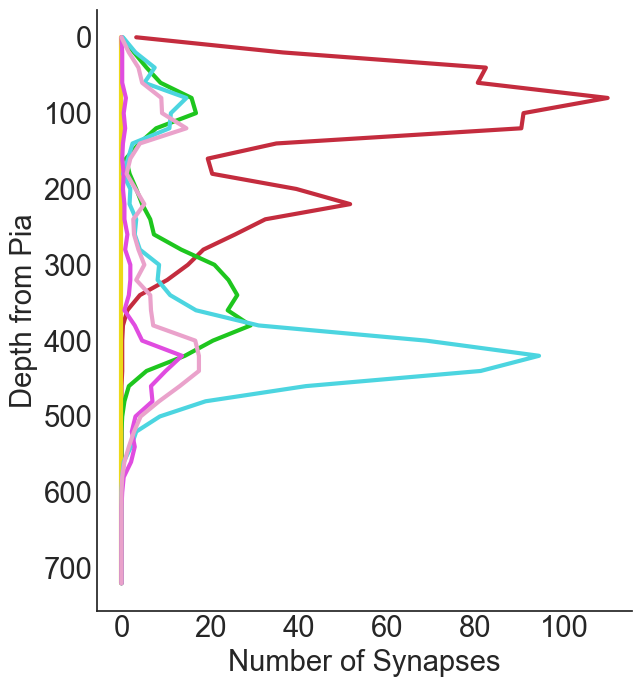

In [23]:
####Met4 avg horizontal histo predicted targets
newall = np.zeros(37, int)
new23 = np.zeros(37, int)
new4 = np.zeros(37, int) 
newit = np.zeros(37, int) 
newpt = np.zeros(37, int)
new6 = np.zeros(37, int) 
newinh = np.zeros(37, int)

met4 =[864691135467660940, 864691136118647832, 864691135013417622, 864691135577202181, 864691135785592004]

for i in sst4_id_cur:   
    print (i)
    ####Predicted calls
    single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id'] == i].copy()
    single_cell['y'] = single_cell['ctr_pt_position'].map(lambda x: x[1])
    single_cell['y'] = (single_cell['y']*.004)-300
    single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas", "size", "y"]].copy()
 
      
    converge = single_cell['post_pt_root_id'].value_counts().rename_axis('post_pt_root_id').reset_index(name ='counts')
    converge_call=pd.merge(single_cell_sub, converge, left_on = 'post_pt_root_id', right_on ='post_pt_root_id', how = 'outer')
    converge_call23 = converge_call.loc[converge_call['cell_type'] == '23P']
    converge_call4 = converge_call.loc[converge_call['cell_type'] == '4P']
    converge_callit = converge_call.loc[converge_call['cell_type'] == '5P-IT']
    converge_callpt = converge_call.loc[converge_call['cell_type'] == '5P-PT']
    converge_call6 = converge_call.loc[(converge_call['cell_type'] == '6P-CT') | (converge_call['cell_type'] == '6P-IT')]
    converge_callinh = converge_call.loc[(converge_call['cell_type'] == 'BC') | (converge_call['cell_type'] == 'BPC') | (converge_call['cell_type'] == 'MC')| (converge_call['cell_type'] == 'NGC')]
    #############  
    
    alltargets = converge_call['y'].to_numpy()
    np23 = converge_call23['y'].to_numpy()
    np4 = converge_call4['y'].to_numpy()
    npit = converge_callit['y'].to_numpy()
    nppt = converge_callpt['y'].to_numpy()
    np6 = converge_call6['y'].to_numpy()
    npinh = converge_callinh['y'].to_numpy()
    
#     historange = np.arange(300,1000,10)
    historange = np.arange(0,750,20)

    histall, bins = np.histogram(alltargets, bins = historange)
    hist23, bins = np.histogram(np23, bins = historange)
    hist4, bins4 = np.histogram(np4, bins = historange)
    histit, bins4 = np.histogram(npit, bins = historange)
    histpt, bins4 = np.histogram(nppt, bins = historange)
    hist6, bins4 = np.histogram(np6, bins = historange)
    histinh, bins4 = np.histogram(npinh, bins = historange)
    
    newall = np.vstack((histall, newall))
    new23 = np.vstack((hist23, new23))
    new4 = np.vstack((hist4, new4))
    newit = np.vstack((histit, newit))
    newpt = np.vstack((histpt, newpt))
    new6 = np.vstack((hist6, new6))
    newinh = np.vstack((histinh, newinh))


##remove empty row for met4 shape
newall = np.delete(newall, 5, 0)
new23 = np.delete(new23, 5, 0)
new4 = np.delete(new4, 5, 0)
newit = np.delete(newit, 5, 0)
newpt = np.delete(newpt, 5, 0)
new6 = np.delete(new6, 5, 0)
newinh = np.delete(newinh, 5, 0)

avgall = np.mean(newall, axis = 0)
avg23 = np.mean(new23, axis = 0)
avg4 = np.mean(new4, axis = 0)
avgit = np.mean(newit, axis = 0)
avgpt = np.mean(newpt, axis = 0)
avg6 = np.mean(new6, axis = 0)
avginh = np.mean(newinh, axis = 0)
bins = np.arange(0, 750, 20)

with plt.style.context('seaborn-white', after_reset = True):

    fig, ax = plt.subplots()
    fig.set_figwidth(6.9)
    fig.set_figheight(7.8)
    
    ax.plot(avg23, bins[:-1], label = "L2/3", color = '#C42C3E', linewidth = 3)
    ax.plot(avg4, bins[:-1], label = "L4", color = '#1EC61E', linewidth = 3)
    ax.plot( avgpt, bins[:-1],label = "L5 ET", color = '#EDD918', linewidth = 3)
    ax.plot( avgit, bins[:-1], label = "L5 IT", color = '#4CD5E0', linewidth = 3)
    ax.plot( avg6,bins[:-1], label = "L6", color = '#E04CE0', linewidth = 3)
    ax.plot( avginh,bins[:-1], label = "INH", color = '#EAA2CB', linewidth = 3)
   
    plt.gca().invert_yaxis()
    ax.set_ylabel('Depth from Pia', fontsize = 21, **afont)
    ax.set_xlabel('Number of Synapses', fontsize = 21, **afont)
    plt.xticks (fontsize =21, **afont)
    plt.yticks (fontsize =21, **afont)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#     plt.savefig('met4_id_syn_hist_pred_targets_wh_muted_arial_bigbatchv1.pdf', bbox_inches = 'tight', transparent = 'True')
    plt.show()


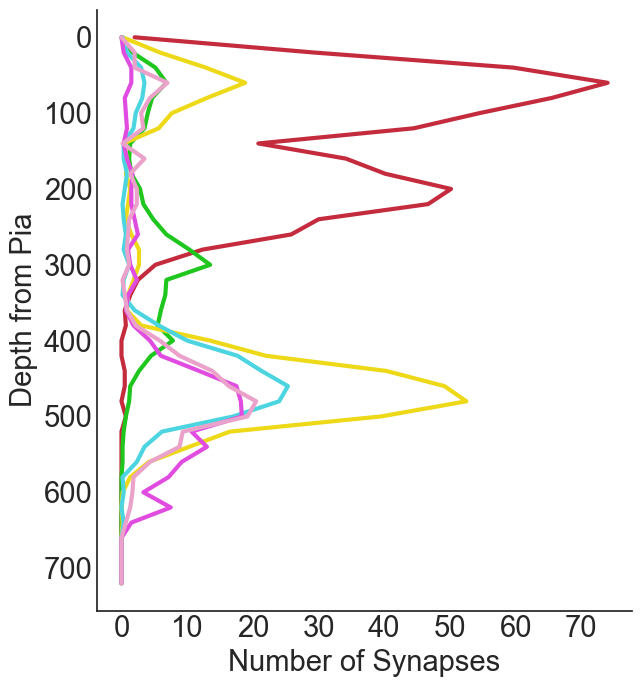

In [9]:
###Pred Met 6 avg horizontal histo predicted targets
newall = np.zeros(37, int)
new23 = np.zeros(37, int)
new4 = np.zeros(37, int) 
newit = np.zeros(37, int) 
newpt = np.zeros(37, int)
new6 = np.zeros(37, int) 
newinh = np.zeros(37, int)



for i in met6_id:  
    
    ###Auto calls
    single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id'] == i].copy()
    single_cell['y'] = single_cell['ctr_pt_position'].map(lambda x: x[1])
    single_cell['y'] = (single_cell['y']*.004)-300
    single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas", "size", "y"]].copy()
 
      
    converge = single_cell['post_pt_root_id'].value_counts().rename_axis('post_pt_root_id').reset_index(name ='counts')
    converge_call=pd.merge(single_cell_sub, converge, left_on = 'post_pt_root_id', right_on ='post_pt_root_id', how = 'outer')
    converge_call23 = converge_call.loc[converge_call['cell_type'] == '23P']
    converge_call4 = converge_call.loc[converge_call['cell_type'] == '4P']
    converge_callit = converge_call.loc[converge_call['cell_type'] == '5P-IT']
    converge_callpt = converge_call.loc[converge_call['cell_type'] == '5P-PT']
    converge_call6 = converge_call.loc[(converge_call['cell_type'] == '6P-CT') | (converge_call['cell_type'] == '6P-IT')]
    converge_callinh = converge_call.loc[(converge_call['cell_type'] == 'BC') | (converge_call['cell_type'] == 'BPC') | (converge_call['cell_type'] == 'MC')| (converge_call['cell_type'] == 'NGC')]
       
#     print (converge_call23.head())
    alltargets = converge_call['y'].to_numpy()
    np23 = converge_call23['y'].to_numpy()
    np4 = converge_call4['y'].to_numpy()
    npit = converge_callit['y'].to_numpy()
    nppt = converge_callpt['y'].to_numpy()
    np6 = converge_call6['y'].to_numpy()
    npinh = converge_callinh['y'].to_numpy()
    
    
    historange = np.arange(0,750,20)
    histall, bins = np.histogram(alltargets, bins = historange)
    hist23, bins = np.histogram(np23, bins = historange)
    hist4, bins4 = np.histogram(np4, bins = historange)
    histit, bins4 = np.histogram(npit, bins = historange)
    histpt, bins4 = np.histogram(nppt, bins = historange)
    hist6, bins4 = np.histogram(np6, bins = historange)
    histinh, bins4 = np.histogram(npinh, bins = historange)
    
    newall = np.vstack((histall, newall))
    new23 = np.vstack((hist23, new23))
    new4 = np.vstack((hist4, new4))
    newit = np.vstack((histit, newit))
    newpt = np.vstack((histpt, newpt))
    new6 = np.vstack((hist6, new6))
    newinh = np.vstack((histinh, newinh))


##remove empty row for met6
newall = np.delete(newall, 6, 0)
new23 = np.delete(new23, 6, 0)
new4 = np.delete(new4, 6, 0)
newit = np.delete(newit, 6, 0)
newpt = np.delete(newpt, 6, 0)
new6 = np.delete(new6, 6, 0)
newinh = np.delete(newinh, 6, 0)

### calc avg hist
avgall = np.mean(newall, axis = 0)
avg23 = np.mean(new23, axis = 0)
avg4 = np.mean(new4, axis = 0)
avgit = np.mean(newit, axis = 0)
avgpt = np.mean(newpt, axis = 0)
avg6 = np.mean(new6, axis = 0)
avginh = np.mean(newinh, axis = 0)
bins = np.arange(0, 750, 20)

with plt.style.context('seaborn-white', after_reset = True):
    fig, ax = plt.subplots()
    fig.set_figwidth(6.9)
    fig.set_figheight(7.8)
    
    ax.plot(avg23, bins[:-1], label = "L2/3", color = '#C42C3E', linewidth = 3)
    ax.plot(avg4, bins[:-1], label = "L4", color = '#1EC61E', linewidth = 3)
    ax.plot( avgpt, bins[:-1],label = "L5 ET", color = '#EDD918', linewidth = 3)
    ax.plot( avgit, bins[:-1], label = "L5 IT", color = '#4CD5E0', linewidth = 3)
    ax.plot( avg6,bins[:-1], label = "L6", color = '#E04CE0', linewidth = 3)
    ax.plot( avginh,bins[:-1], label = "INH", color = '#EAA2CB', linewidth = 3)
    plt.gca().invert_yaxis()

#     plt.title('Average Synapse Histogram - Predicted Targets', fontsize = 16, **afont)
    ax.set_ylabel('Depth from Pia', fontsize = 21, **afont)
    ax.set_xlabel('Number of Synapses', fontsize = 21, **afont)
    plt.xticks (fontsize =21, **afont)
    plt.yticks (fontsize =21, **afont)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


#     plt.savefig('Met6_id_syn_hist_pred_targets_wh_muted_arial_bigbatchv1.pdf', bbox_inches = 'tight', transparent = 'True')
    plt.show()

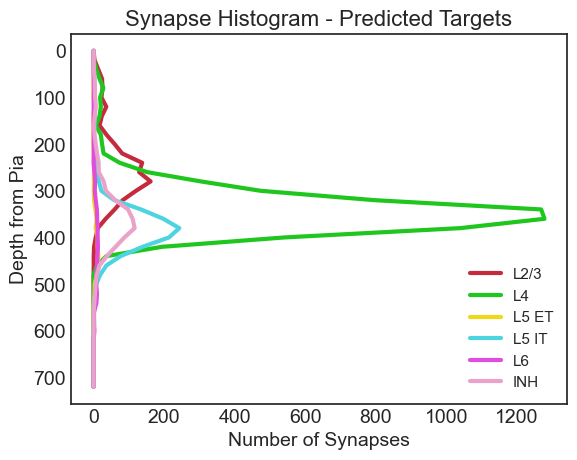

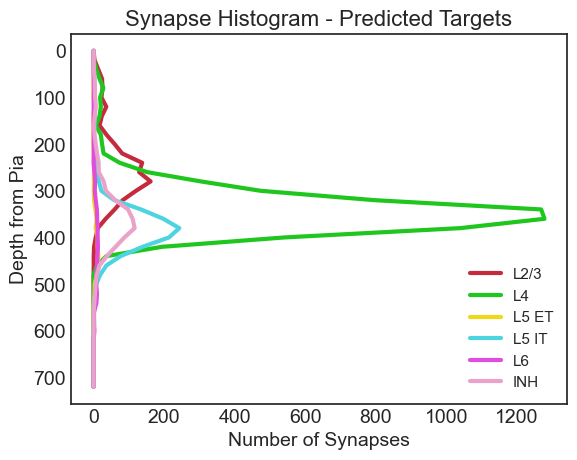

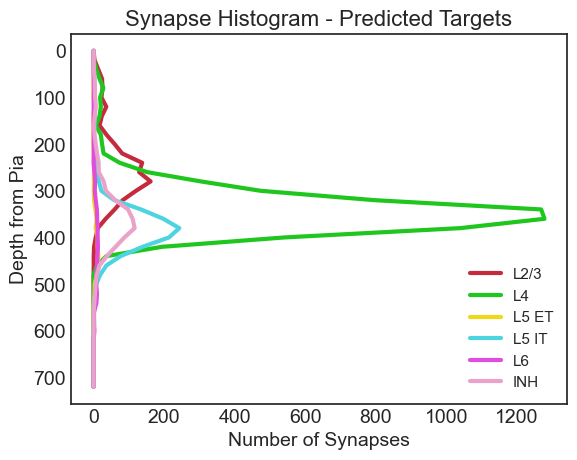

In [17]:
####Met5 shaped avg horizontal histo predicted targets
# met3_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_met_type_label'] == "Sst-MET-3"]
# met3_id = met3_pred["id"]
# # met9_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_MET-type Label'] == "Sst-MET-9"]
# # met9_id = met6_pred["id"]

for i in metid:
    
    ###Auto calls
    single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id'] == i].copy()
    single_cell['y'] = single_cell['ctr_pt_position'].map(lambda x: x[1])
    single_cell['y'] = (single_cell['y']*.004)-300
    single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas", "size", "y"]]
 
      
    converge = single_cell['post_pt_root_id'].value_counts().rename_axis('post_pt_root_id').reset_index(name ='counts')
    converge_call=pd.merge(single_cell_sub, converge, left_on = 'post_pt_root_id', right_on ='post_pt_root_id', how = 'outer')
    sorted_converge = converge_call.sort_values(["y"], ascending = True)
#     print (sorted_converge.head(10))
    converge_call23 = converge_call.loc[converge_call['cell_type'] == '23P']
    converge_call4 = converge_call.loc[converge_call['cell_type'] == '4P']
    converge_callit = converge_call.loc[converge_call['cell_type'] == '5P-IT']
    converge_callpt = converge_call.loc[converge_call['cell_type'] == '5P-ET']
    converge_call6 = converge_call.loc[(converge_call['cell_type'] == '6P-CT') | (converge_call['cell_type'] == '6P-IT')]
    converge_callinh = converge_call.loc[(converge_call['cell_type'] == 'BC') | (converge_call['cell_type'] == 'BPC') | (converge_call['cell_type'] == 'MC')| (converge_call['cell_type'] == 'NGC')]
       
#     print (converge_call23.head())
    alltargets = converge_call['y'].to_numpy()
    np23 = converge_call23['y'].to_numpy()
    np4 = converge_call4['y'].to_numpy()
    npit = converge_callit['y'].to_numpy()
    nppt = converge_callpt['y'].to_numpy()
    np6 = converge_call6['y'].to_numpy()
    npinh = converge_callinh['y'].to_numpy()
    
    
    historange = np.arange(0,750,20)
    histall, bins = np.histogram(alltargets, bins = historange)
    hist23, bins = np.histogram(np23, bins = historange)
    hist4, bins4 = np.histogram(np4, bins = historange)
    histit, bins4 = np.histogram(npit, bins = historange)
    histpt, bins4 = np.histogram(nppt, bins = historange)
    hist6, bins4 = np.histogram(np6, bins = historange)
    histinh, bins4 = np.histogram(npinh, bins = historange)
    
    newall = np.vstack((histall, newall))
    new23 = np.vstack((hist23, new23))
    new4 = np.vstack((hist4, new4))
    newit = np.vstack((histit, newit))
    newpt = np.vstack((histpt, newpt))
    new6 = np.vstack((hist6, new6))
    newinh = np.vstack((histinh, newinh))


    ##remove empty row for met8
    newall = np.delete(newall, lenid, 0)
    new23 = np.delete(new23, lenid, 0)
    new4 = np.delete(new4, lenid, 0)
    newit = np.delete(newit, lenid, 0)
    newpt = np.delete(newpt, lenid, 0)
    new6 = np.delete(new6, lenid, 0)
    newinh = np.delete(newinh, lenid, 0)

    ### calc avg hist

    avgall = np.mean(newall, axis = 0)
    avg23 = np.mean(new23, axis = 0)
    avg4 = np.mean(new4, axis = 0)
    avgit = np.mean(newit, axis = 0)
    avgpt = np.mean(newpt, axis = 0)
    avg6 = np.mean(new6, axis = 0)
    avginh = np.mean(newinh, axis = 0)
    bins = np.arange(0, 750, 20)


    with plt.style.context('seaborn-white', after_reset = True):

        fig, ax = plt.subplots()
        ax.plot(avg23, bins[:-1], label = "L2/3", color = '#C42C3E', linewidth = 3)
        ax.plot(avg4, bins[:-1], label = "L4", color = '#1EC61E', linewidth = 3)
        ax.plot( avgpt, bins[:-1],label = "L5 ET", color = '#EDD918', linewidth = 3)
        ax.plot( avgit, bins[:-1], label = "L5 IT", color = '#4CD5E0', linewidth = 3)
        ax.plot( avg6,bins[:-1], label = "L6", color = '#E04CE0', linewidth = 3)
        ax.plot( avginh,bins[:-1], label = "INH", color = '#EAA2CB', linewidth = 3)
        plt.gca().invert_yaxis()
        ax.set_ylabel('Depth from Pia', fontsize = 14, **afont)
        ax.set_xlabel('Number of Synapses', fontsize = 14, **afont)
        plt.xticks (fontsize =14, **afont)
        plt.yticks (fontsize =14, **afont)
        plt.legend(prop = {'family':'Arial', 'size': 11}, loc = 'lower right')
    #     plt.legend(prop = {'family':'Arial', 'size': 11}, loc = 'upper right')
        # #
    #     plt.title('Average Synapse Histogram - Manual Targets', fontsize = 16, **afont)
    #     plt.savefig('met5_syn_hist_man_targets_wh_green_arial.png')
        plt.title('Synapse Histogram - Predicted Targets', fontsize = 16, **afont)
    #     plt.savefig('CG_met5_syn_hist_pred_targets_wh_green_arial.pdf')
        plt.show()


5
864691135416719546
864691135575425822
864691135808473885
864691135969582181
864691136602069713


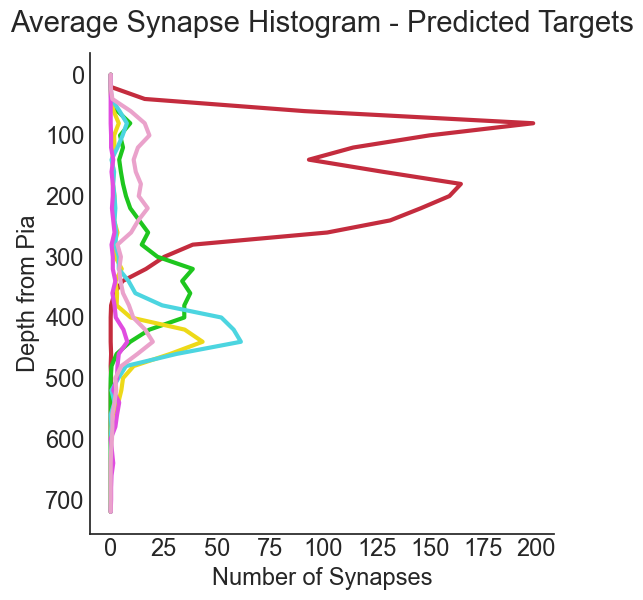

In [24]:
###Pred Met 8 & 6 avg horizontal histo predicted targets
# plt.rcParams["figure.figsize"] = (1,10)

newall = np.zeros(37, int)
new23 = np.zeros(37, int)
new4 = np.zeros(37, int) 
newit = np.zeros(37, int) 
newpt = np.zeros(37, int)
new6 = np.zeros(37, int) 
newinh = np.zeros(37, int)

# for i in met8_id: 
metid = sst4_id_col
var_name = 'sst4_id_col'
lenid = len(metid)
print (lenid)
for i in metid:
    print (i) 
    ###Auto calls
    single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id'] == i].copy()
    single_cell['y'] = single_cell['ctr_pt_position'].map(lambda x: x[1])
    single_cell['y'] = (single_cell['y']*.004)-300
    single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas", "size", "y"]]
 
      
    converge = single_cell['post_pt_root_id'].value_counts().rename_axis('post_pt_root_id').reset_index(name ='counts')
    converge_call=pd.merge(single_cell_sub, converge, left_on = 'post_pt_root_id', right_on ='post_pt_root_id', how = 'outer')
    sorted_converge = converge_call.sort_values(["y"], ascending = True)
#     print (sorted_converge.head(10))
    converge_call23 = converge_call.loc[converge_call['cell_type'] == '23P']
    converge_call4 = converge_call.loc[converge_call['cell_type'] == '4P']
    converge_callit = converge_call.loc[converge_call['cell_type'] == '5P-IT']
    converge_callpt = converge_call.loc[converge_call['cell_type'] == '5P-ET']
    converge_call6 = converge_call.loc[(converge_call['cell_type'] == '6P-CT') | (converge_call['cell_type'] == '6P-IT')]
    converge_callinh = converge_call.loc[(converge_call['cell_type'] == 'BC') | (converge_call['cell_type'] == 'BPC') | (converge_call['cell_type'] == 'MC')| (converge_call['cell_type'] == 'NGC')]
       
#     print (converge_call23.head())
    alltargets = converge_call['y'].to_numpy()
    np23 = converge_call23['y'].to_numpy()
    np4 = converge_call4['y'].to_numpy()
    npit = converge_callit['y'].to_numpy()
    nppt = converge_callpt['y'].to_numpy()
    np6 = converge_call6['y'].to_numpy()
    npinh = converge_callinh['y'].to_numpy()
    
    
    historange = np.arange(0,750,20)
    histall, bins = np.histogram(alltargets, bins = historange)
    hist23, bins = np.histogram(np23, bins = historange)
    hist4, bins4 = np.histogram(np4, bins = historange)
    histit, bins4 = np.histogram(npit, bins = historange)
    histpt, bins4 = np.histogram(nppt, bins = historange)
    hist6, bins4 = np.histogram(np6, bins = historange)
    histinh, bins4 = np.histogram(npinh, bins = historange)
    
    newall = np.vstack((histall, newall))
    new23 = np.vstack((hist23, new23))
    new4 = np.vstack((hist4, new4))
    newit = np.vstack((histit, newit))
    newpt = np.vstack((histpt, newpt))
    new6 = np.vstack((hist6, new6))
    newinh = np.vstack((histinh, newinh))


##remove empty row for met8
newall = np.delete(newall, lenid, 0)
new23 = np.delete(new23, lenid, 0)
new4 = np.delete(new4, lenid, 0)
newit = np.delete(newit, lenid, 0)
newpt = np.delete(newpt, lenid, 0)
new6 = np.delete(new6, lenid, 0)
newinh = np.delete(newinh, lenid, 0)

### calc avg hist

avgall = np.mean(newall, axis = 0)
avg23 = np.mean(new23, axis = 0)
avg4 = np.mean(new4, axis = 0)
avgit = np.mean(newit, axis = 0)
avgpt = np.mean(newpt, axis = 0)
avg6 = np.mean(new6, axis = 0)
avginh = np.mean(newinh, axis = 0)
bins = np.arange(0, 750, 20)

with plt.style.context('seaborn-white', after_reset = True):
    fig, ax = plt.subplots()
    fig.set_figwidth(5.7)
    fig.set_figheight(6.1)
    afont = {'fontname':'Arial'}


#     print (plt.rcParams["figure.figsize"])
    ax.plot(avg23, bins[:-1], label = "L2/3", color = '#C42C3E', linewidth = 3)
    ax.plot(avg4, bins[:-1], label = "L4", color = '#1EC61E', linewidth = 3)
    ax.plot( avgpt, bins[:-1],label = "L5 ET", color = '#EDD918', linewidth = 3)
    ax.plot( avgit, bins[:-1], label = "L5 IT", color = '#4CD5E0', linewidth = 3)
    ax.plot( avg6,bins[:-1], label = "L6", color = '#E04CE0', linewidth = 3)
    ax.plot( avginh,bins[:-1], label = "INH", color = '#EAA2CB', linewidth = 3)
   
    
    plt.gca().invert_yaxis()
    
    plt.title('Average Synapse Histogram - Predicted Targets', fontsize = 21, **afont, pad = 15)
    ax.set_ylabel('Depth from Pia', fontsize = 17, **afont)
    ax.set_xlabel('Number of Synapses', fontsize = 17, **afont)
    plt.xticks (fontsize =17, **afont)
    plt.yticks (fontsize =17, **afont)
#     plt.legend(prop = {'family':'Arial', 'size': 16})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
#     plt.savefig('{}_syn_hist_pred_targets_wh_green_arial_muted_revis.pdf'.format(var_name), bbox_inches = 'tight', transparent = 'True')
    plt.show()